In [1]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

# Data Prepping:

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('cifar-10-batches-py/data_batch_5')

In [4]:
batch_meta = unpickle('cifar-10-batches-py/batches.meta')

In [5]:
batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [6]:
batch_meta.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [7]:
label_names = batch_meta[b'label_names']

In [8]:
label_names[0]

b'airplane'

In [9]:
data = np.concatenate([batch_1[b'data'],batch_2[b'data'],batch_3[b'data'],batch_4[b'data'],batch_5[b'data']],axis=0)

In [10]:
data.shape

(50000, 3072)

In [11]:
train_data = data.reshape(50000,3,32,32).transpose(0,2,3,1)

In [12]:
train_data.shape

(50000, 32, 32, 3)

In [13]:
x_train = train_data.copy()

In [14]:
# Explanation of the train dataset
sample = np.arange(1,81).reshape(10,8).reshape(10,2,2,2).transpose(0,1,3,2)

In [15]:
train_data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

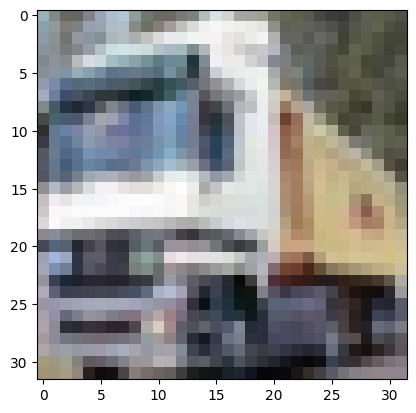

In [16]:
plt.imshow(train_data[1]) # truck

In [17]:
type(label_names[0])

bytes

In [18]:
labels = {num:label.decode('utf-8') for num, label in enumerate(label_names)}

In [19]:
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [21]:
y_train = np.array([batch_1[b'labels'],batch_2[b'labels'],batch_3[b'labels'],batch_4[b'labels'],batch_5[b'labels']]).flatten()

In [22]:
batch_test = unpickle('cifar-10-batches-py/test_batch')

In [23]:
batch_test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [24]:
test_data = batch_test[b'data']

In [25]:
x_test = test_data.reshape(10000,3,32,32).transpose(0,2,3,1)

In [26]:
x_test.shape

(10000, 32, 32, 3)

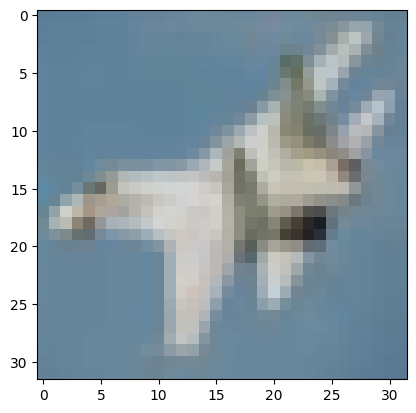

In [27]:
plt.imshow(x_test[10]) 

In [28]:
y_test = np.array(batch_test[b'labels'])

In [29]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [30]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# Modelling :

CNN:
1. Convolution layer + pooling + Conv + Pooling + Flattening + NN

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
cnn = tf.keras.Sequential()

In [33]:

# SET-1

cnn.add(tf.keras.layers.Conv2D(
    filters=32,  # No of filters
    kernel_size=(3,3), # filter size
    strides=(1, 1), # jumps the filter takes 
    padding='valid',
    data_format=None, 
    dilation_rate=(1, 1),
    groups=1,
    activation='relu',
    input_shape = (32,32,3)
))

In [34]:
cnn.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
))

In [35]:
# SET -2

cnn.add(tf.keras.layers.Conv2D(
    filters=64,  # No of filters
    kernel_size=(3,3), # filter size
    strides=(1, 1), # jumps the filter takes 
    padding='valid',
    activation='relu',
))
cnn.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
))

In [36]:
# Flattening
cnn.add(tf.keras.layers.Flatten())

In [37]:
# Normal Dense Network

cnn.add(tf.keras.layers.Dense(
    64, activation='relu'
))
cnn.add(tf.keras.layers.Dense(
    10, activation='softmax'
))

In [38]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
cnn.fit(x_train,y_train,epochs=20, initial_epoch=11)

Epoch 12/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6969 - accuracy: 0.7583
Epoch 13/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6567 - accuracy: 0.7737
Epoch 14/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6410 - accuracy: 0.7747
Epoch 15/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6084 - accuracy: 0.7865
Epoch 16/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5845 - accuracy: 0.7959
Epoch 17/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.5642 - accuracy: 0.8029
Epoch 18/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.5490 - accuracy: 0.8088
Epoch 19/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5351 - accuracy: 0.8121
Epoch 20/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5150 - accuracy: 0.8208


In [41]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 11ms/step - loss: 1.3729 - accuracy: 0.6462


[1.3729175329208374, 0.6462000012397766]

In [43]:
x_test.shape

(10000, 32, 32, 3)

In [46]:
x_test[:1,:,:,:].shape

(1, 32, 32, 3)

In [50]:
sample_preds=cnn.predict(x_test[:5,:,:,:])

1/1 [==============================] - 0s 66ms/step


In [51]:
sample_preds

array([[1.0535712e-01, 2.4269968e-06, 2.2166323e-02, 5.3186440e-01,
        5.8773316e-02, 9.4235748e-02, 3.6538661e-02, 6.1788704e-02,
        8.9095384e-02, 1.7788478e-04],
       [7.4230069e-05, 4.1346243e-01, 1.3495826e-14, 1.4028497e-09,
        2.0057776e-14, 4.7324387e-16, 4.3291228e-21, 1.5145486e-14,
        5.8646172e-01, 1.5262881e-06],
       [3.9286408e-01, 4.0467732e-02, 1.6953665e-04, 1.2843913e-03,
        6.0999970e-05, 1.3127186e-05, 6.9925676e-07, 1.3139761e-05,
        5.5472720e-01, 1.0399180e-02],
       [9.9144453e-01, 6.9075827e-07, 3.7082746e-03, 9.3195739e-04,
        1.7881870e-03, 2.4755469e-05, 8.7367262e-05, 2.4040793e-04,
        1.7656491e-03, 8.1490352e-06],
       [1.5138675e-04, 1.5068682e-10, 6.1543848e-02, 5.6129862e-02,
        4.0245959e-01, 8.0246450e-03, 4.6934205e-01, 2.3485764e-03,
        2.8545717e-08, 4.2900266e-09]], dtype=float32)

In [52]:
sample_preds.shape

(5, 10)

In [55]:
for idx,pred in enumerate(sample_preds):
    print(f"Prediction:{labels[np.argmax(pred)]}, Actual :{labels[y_test[idx]]}")

Prediction:cat, Actual :cat
Prediction:ship, Actual :ship
Prediction:ship, Actual :ship
Prediction:airplane, Actual :airplane
Prediction:frog, Actual :frog
